In [10]:
import pandas as pd

papers = pd.read_csv('datasets/papers.csv') # source: kaggle
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [11]:
papers = papers.drop(['id', 'pdf_name', 'event_type'], axis=1) # drop unwanted columns
papers.head()


,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


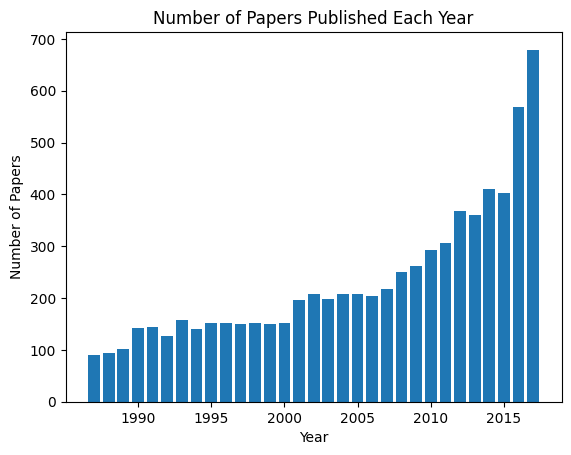

In [14]:
import matplotlib.pyplot as plt

# Count the number of papers per year
papers_per_year = papers['year'].value_counts().sort_index()

# Create a bar graph
plt.bar(papers_per_year.index, papers_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.title('Number of Papers Published Each Year')
plt.show()

In [15]:
import re

# use regex to remove any punctuations from title (preprocessing)
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

print(papers['title_processed'])

0       self-organization of associative database and ...
1       a mean field theory of layer iv of visual cort...
2       storing covariance by the associative long-ter...
3       bayesian query construction for neural network...
4       neural network ensembles cross validation and ...
                              ...                        
7236                  single transistor learning synapses
7237    bias variance and the combination of least squ...
7238            a real time clustering cmos neural engine
7239    learning direction in global motion: two class...
7240    correlation and interpolation networks for rea...
Name: title_processed, Length: 7241, dtype: object


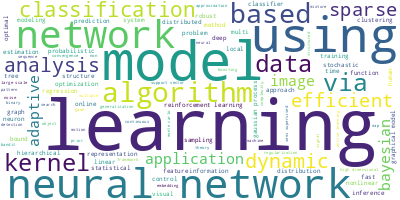

In [18]:
from wordcloud import WordCloud

# create a wordcloud
long_string = ','.join(list(papers['title_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

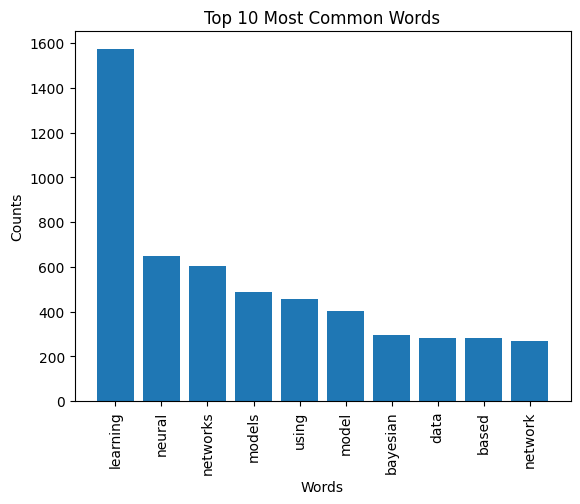

In [22]:
# preparing data for LDA analysis (vectorizing)
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def plot_most_common_words(count_data, count_vectorizer, top_n=10):
    # Extract feature names (words) and calculate total counts
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.sum(count_data.toarray(), axis=0)

    # Get the top N most common words and their counts
    count_dict = sorted(zip(words, total_counts), key=lambda x: x[1], reverse=True)[:top_n]
    words, counts = zip(*count_dict)

    # Plot the results
    x_pos = np.arange(len(words))
    plt.bar(x_pos, counts, align='center')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.title(f'Top {top_n} Most Common Words')
    plt.show()

# Initialize CountVectorizer with English stop words and fit-transform the processed titles
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualize the top 10 most common words
plot_most_common_words(count_data, count_vectorizer)

In [23]:
import warnings
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Suppress specific warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def print_topics(model, count_vectorizer, n_top_words=6):
    """Prints the top words for each topic identified by the LDA model."""
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        top_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"\nTopic #{topic_idx}: {' '.join(top_words)}")

# Parameters
n_topics = 10
n_top_words = 6

# Create and fit the LDA model
lda_model = LDA(n_components=n_topics, random_state=42)
lda_model.fit(count_data)

# Display the topics
print("Topics identified by LDA:")
print_topics(lda_model, count_vectorizer, n_top_words)

Topics identified by LDA:

Topic #0: models learning gradient optimization stochastic algorithm

Topic #1: networks neural recurrent learning deep network

Topic #2: learning multi models image task analysis

Topic #3: gaussian inference process processes regression variational

Topic #4: learning using model vector network detection

Topic #5: recognition based visual speech estimation density

Topic #6: neural model propagation networks bayesian inference

Topic #7: learning supervised using online dynamic semi

Topic #8: learning spike data network neural separation

Topic #9: learning high sparse dimensional reinforcement optimal
